In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.tree import DecisionTreeClassifier
import itertools
import xgboost as xgb
from sklearn import metrics
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
pip install imblearn

     |████████████████████████████████| 189 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 23.2 MB 7.3 MB/s eta 0:00:01
  Using cached threadpoolctl-3.0.0-py3-none-any.whl (14 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv("urldata.csv")

In [5]:
df.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0
1,1,https://www.youtube.com,benign,0
2,2,https://www.facebook.com,benign,0
3,3,https://www.baidu.com,benign,0
4,4,https://www.wikipedia.org,benign,0


In [6]:
df.shape

(450176, 4)

In [7]:
length_of_url = [] # length of url
number_of_letters = [] # number of alphanumeric characters
number_of_digits = [] # number of digits
count_of_dotcom = [] # count of '.com'
count_of_codot = [] # count of '.co.'
count_of_dotnet = [] # count of '.net'
count_of_forward_slash = [] # count of '/'
count_of_percentage = [] # count of '%'
count_of_upper_case = [] # count of upper case characters
count_of_lower_case = [] # count of upper case characters
count_of_dot = [] # count of "."
count_of_upper_case = [] # count of upper case characters
count_of_lower_case = [] # count of lower case characters
count_of_dot_info = [] # count of '.info'
count_of_https = [] # count of 'https'
count_of_www_dot = [] # count of 'www.'
count_of_not_alphanumeric = [] # count of non-alphanumeric characters

for item in df['url']:
    try:
        length_of_url.append(len(item))
    except:
        length_of_url.append(0)
        
    try:
        number_of_letters.append(sum(c.isalpha() for c in item))
    except:
        number_of_letters.append(0)
        
    try:
        number_of_digits.append(sum(c.isdigit() for c in item))
    except:
        number_of_digits.append(0)
    
    try:
        count_of_dotcom.append(item.count(".com"))
    except:
        count_of_dotcom.append(0)
        
    try:
        count_of_codot.append(item.count(".co."))
    except:
        count_of_codot.append(0)
        
    try:
        count_of_dotnet.append(item.count(".net"))
    except:
        count_of_dotnet.append(0)
        
    try:
        count_of_forward_slash.append(item.count("/"))
    except:
        count_of_forward_slash.append(0)
        
    try:
        count_of_percentage.append(item.count("%"))
    except:
        count_of_percentage.append(0)

    try:
        count_of_dot.append(item.count("."))
    except:
        count_of_dot.append(0)    
        
    try:
        count_of_upper_case.append(sum(c.isupper() for c in item))
    except:
        count_of_upper_case.append(0)
    
    try:
        count_of_lower_case.append(sum(c.islower() for c in item))
    except:
        count_of_lower_case.append(0)
        
    try:
        count_of_dot_info.append(item.count(".info"))
    except:
        count_of_dot_info.append(0)
        
    try:
        count_of_https.append(item.count("https"))
    except:
        count_of_https.append(0)
        
    try:
        count_of_www_dot.append(item.count("www."))
    except:
        count_of_www_dot.append(0)
        
    try:
        count_of_not_alphanumeric.append(sum(not c.isalnum() for c in item))
    except:
        count_of_not_alphanumeric.append(0)

In [8]:
df['length_of_url'] = length_of_url
df['number_of_letters'] = number_of_letters
df['number_of_digits'] = number_of_digits
df['count_of_dotcom'] = count_of_dotcom
df['count_of_codot'] = count_of_codot
df['count_of_dotnet'] = count_of_dotnet
df['count_of_forward_slash'] = count_of_forward_slash
df['count_of_upper_case'] = count_of_upper_case
df['count_of_lower_case'] = count_of_lower_case
df['count_of_dot'] = count_of_dot
df['count_of_upper_case'] = count_of_upper_case
df['count_of_lower_case'] = count_of_lower_case
df['count_of_dot_info'] = count_of_dot_info
df['count_of_https'] = count_of_https
df['count_of_www_dot'] = count_of_www_dot
df['count_of_not_alphanumeric'] = count_of_not_alphanumeric
df['count_of_percentage'] = count_of_percentage

## Amount of symbols to letters ratio
df['not_alphanumeric_to_letters_ratio'] = df['count_of_not_alphanumeric']/df['number_of_letters']

## Amount of '%' to length ratio
df['percentage_to_length_ratio'] = df['count_of_percentage']/df['length_of_url']

## Amount of '%' to length ratio
df['percentage_to_length_ratio'] = df['count_of_percentage']/df['length_of_url']

## Amount of '/' to length ratio
df['forwards_slash_to_length_ratio'] = df['count_of_forward_slash']/df['length_of_url']

## Amount captialised vs. non-capitalised
df['upper_case_to_lower_case_ratio'] = df['count_of_upper_case']/df['count_of_lower_case']

In [9]:
df.head()

,Unnamed: 0,url,label,result,length_of_url,number_of_letters,number_of_digits,count_of_dotcom,count_of_codot,count_of_dotnet,...,count_of_dot,count_of_dot_info,count_of_https,count_of_www_dot,count_of_not_alphanumeric,count_of_percentage,not_alphanumeric_to_letters_ratio,percentage_to_length_ratio,forwards_slash_to_length_ratio,upper_case_to_lower_case_ratio
0,0,https://www.google.com,benign,0,22,17,0,1,0,0,...,2,0,1,1,5,0,0.294118,0.0,0.090909,0.0
1,1,https://www.youtube.com,benign,0,23,18,0,1,0,0,...,2,0,1,1,5,0,0.277778,0.0,0.086957,0.0
2,2,https://www.facebook.com,benign,0,24,19,0,1,0,0,...,2,0,1,1,5,0,0.263158,0.0,0.083333,0.0
3,3,https://www.baidu.com,benign,0,21,16,0,1,0,0,...,2,0,1,1,5,0,0.312500,0.0,0.095238,0.0
4,4,https://www.wikipedia.org,benign,0,25,20,0,0,0,0,...,2,0,1,1,5,0,0.250000,0.0,0.080000,0.0


Text(0, 0.5, 'Number Of URLs')

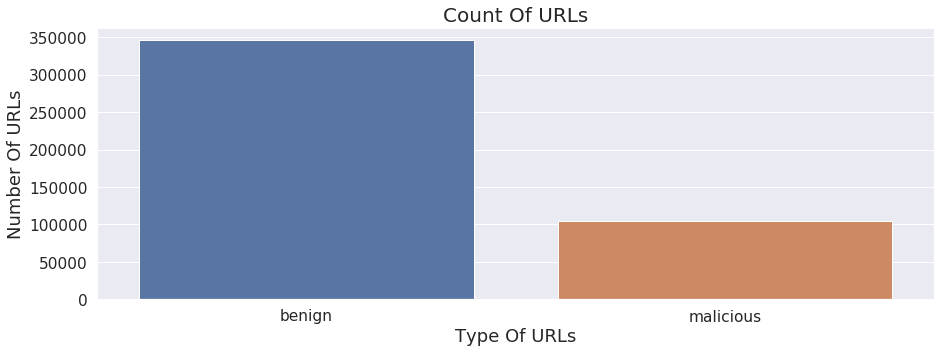

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=df)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [11]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(df[df['label']=='malicious'])/len(df['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(df[df['label']=='benign'])/len(df['label'])*100))

Percent Of Malicious URLs:23.20 %
Percent Of Benign URLs:76.80 %


(0, 1000)

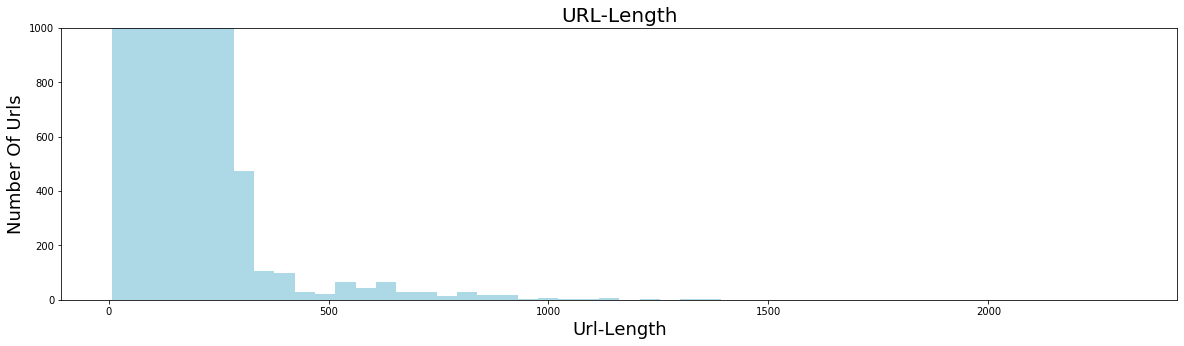

In [12]:
plt.figure(figsize=(20,5))
plt.hist(df['length_of_url'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

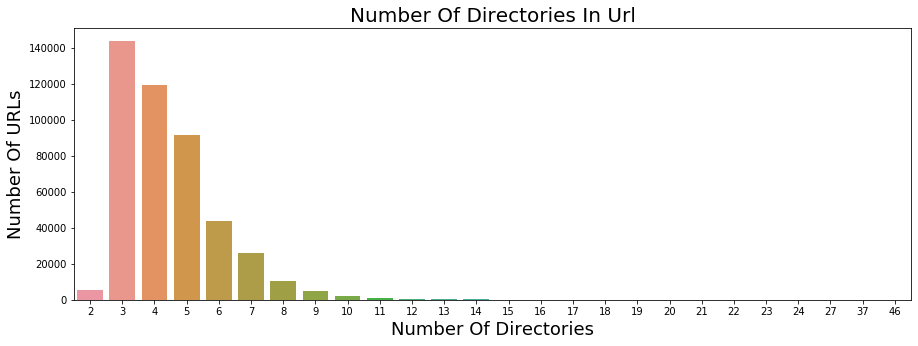

In [13]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_of_forward_slash',data=df)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

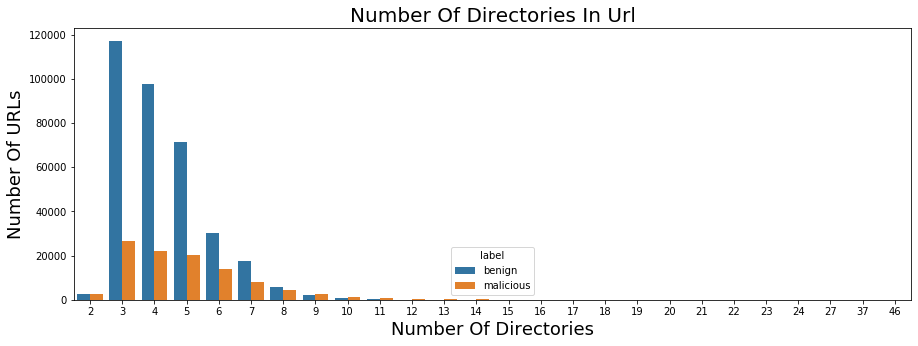

In [14]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_of_forward_slash',data=df,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

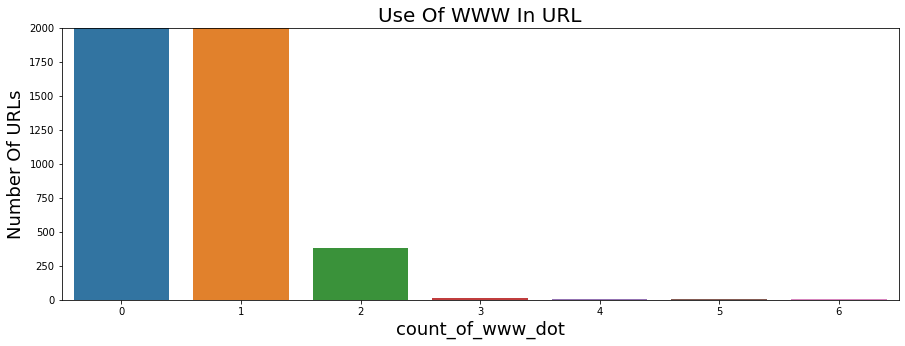

In [15]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)
sns.countplot(df['count_of_www_dot'])
plt.ylim(0,2000)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

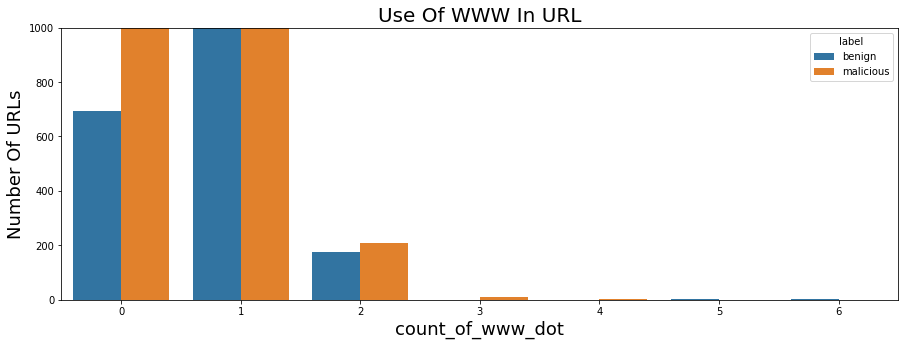

In [16]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)

sns.countplot(df['count_of_www_dot'],hue='label',data=df)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

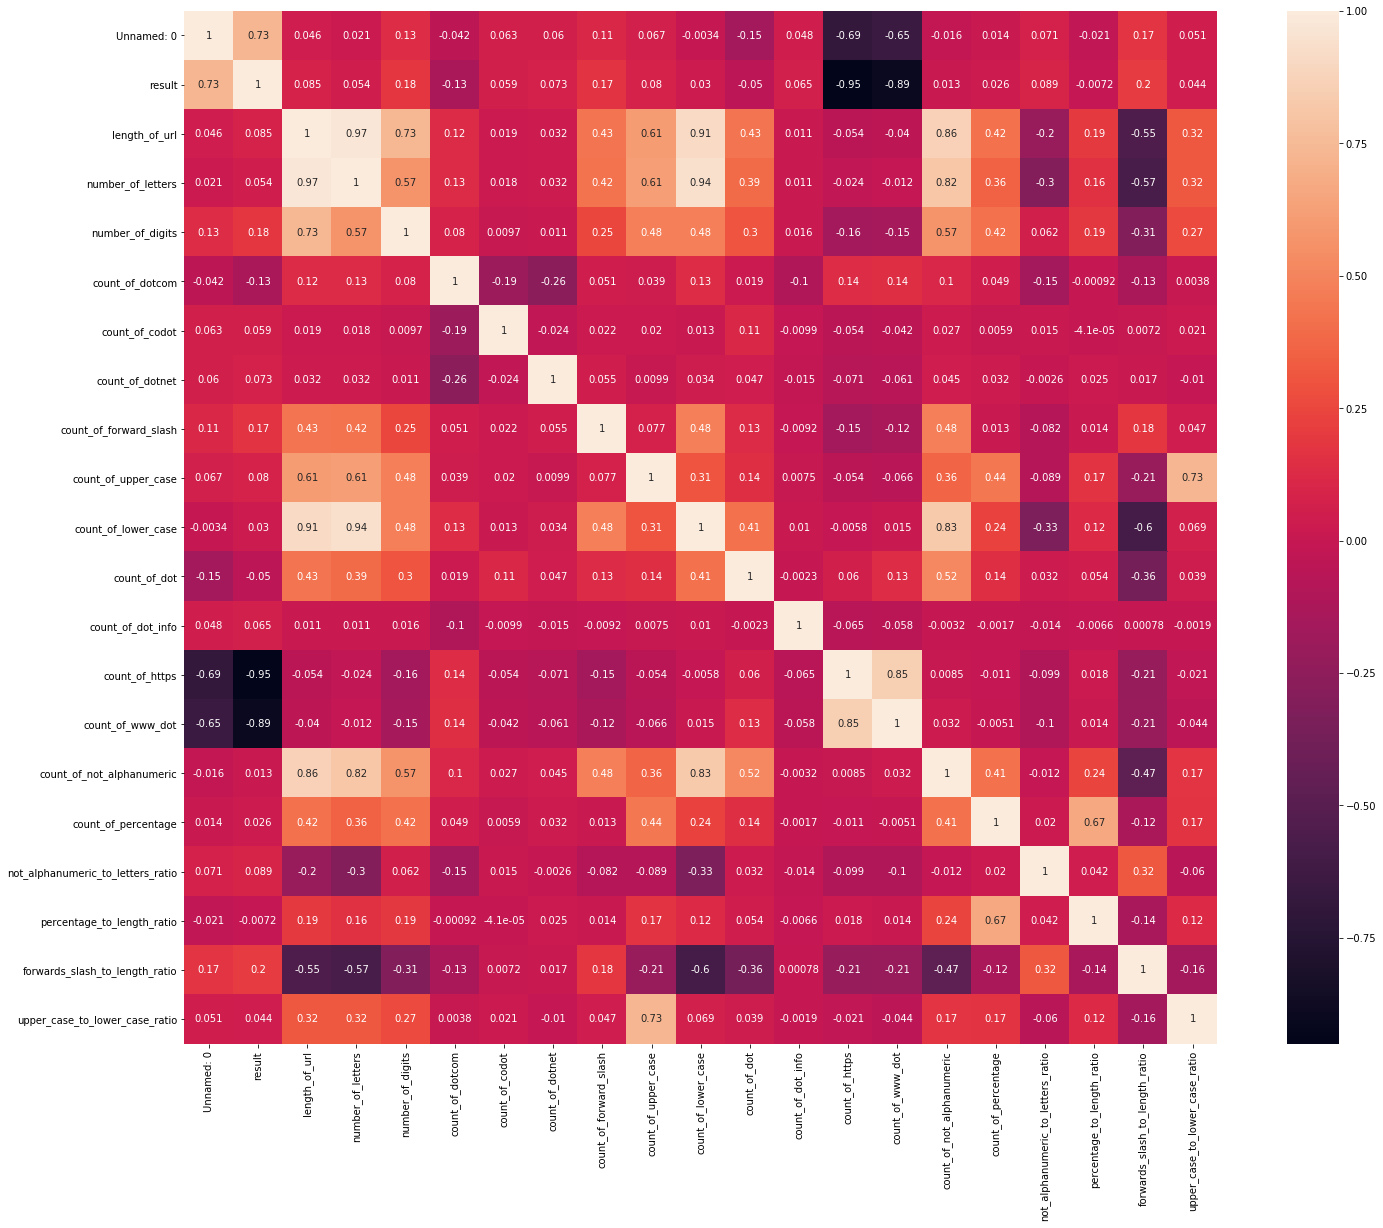

In [17]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

In [10]:
from collections import Counter

In [11]:
# Define X and y
X = df[['length_of_url', 'number_of_letters', 'number_of_digits',
       'count_of_dotcom', 'count_of_codot', 'count_of_dotnet',
       'count_of_forward_slash', 'count_of_upper_case', 'count_of_lower_case',
       'count_of_dot', 'count_of_dot_info', 'count_of_https',
       'count_of_www_dot', 'count_of_not_alphanumeric', 'count_of_percentage',
       'percentage_to_length_ratio','forwards_slash_to_length_ratio']]

y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.20,
    random_state=234)

counter = Counter(y_train)
print(counter)

smt = SMOTE()

X_train,y_train = smt.fit_resample(X_train,y_train)
counter = Counter(y_train)
print(counter)

print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Counter({'benign': 276405, 'malicious': 83735})
Counter({'benign': 276405, 'malicious': 276405})
Training dataset shape: (552810, 17) (552810,)
Testing dataset shape: (90036, 17) (90036,)


In [12]:
depth_list = []
accuracy_list = []

for depth in range(1,len(X.columns)):
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    decision_tree.fit(X_train, y_train)
    accuracy = decision_tree.score(X_test,y_test)
    print('Depth: ',depth, ' Accuracy: ', accuracy)
    accuracy_list.append(decision_tree.score(X_test,y_test))
    depth_list.append(depth)

Depth:  1  Accuracy:  0.9839175440934738
Depth:  2  Accuracy:  0.9959127460127061
Depth:  3  Accuracy:  0.9960571327024745
Depth:  4  Accuracy:  0.9960349193655871
Depth:  5  Accuracy:  0.9961681993869119
Depth:  6  Accuracy:  0.9962681594029055
Depth:  7  Accuracy:  0.9962015193922431
Depth:  8  Accuracy:  0.9962348393975743
Depth:  9  Accuracy:  0.9961459860500245
Depth:  10  Accuracy:  0.9964458660980052
Depth:  11  Accuracy:  0.996412546092674
Depth:  12  Accuracy:  0.9965125061086676
Depth:  13  Accuracy:  0.9963903327557866
Depth:  14  Accuracy:  0.9963459060820117
Depth:  15  Accuracy:  0.9964014394242303
Depth:  16  Accuracy:  0.9963236927451242


In [13]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score ,precision_score, recall_score


y_dt = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_dt)


f1_score = f1_score(y_test, y_dt, average='macro')

acc = accuracy_score(y_test, y_dt)
pre_dt = precision_score(y_test, y_dt, average='macro')
recall_dt = recall_score(y_test, y_dt, average='macro')
#score = []
#score.append(f1_score)
#score.append(format(recall_score))
#score.append(precision_score)
#score.append(acc)
#print(format(f1_score))
print(acc)
print(pre_dt)
print(recall_dt)
cm

0.9963236927451242
0.9959067801832688
0.9936999410782812


array([[69233,   100],
       [  231, 20472]])

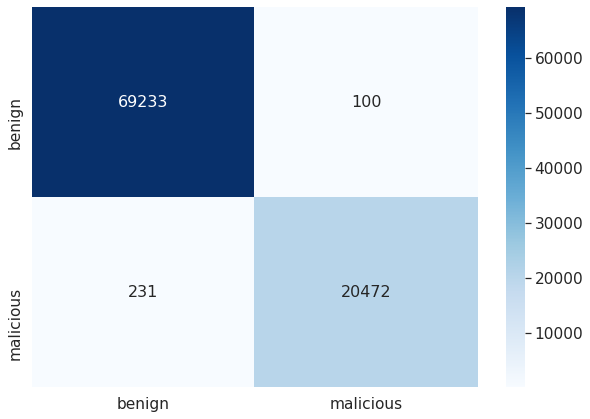

In [14]:
array2 = cm
df_cm = pd.DataFrame(array2, index = [i for i in ['benign', 'malicious']],
                  columns = [i for i in ['benign', 'malicious']])
sns.set(font_scale=1.4) # for label size
plt.figure(figsize = (10,7))
plt.ticklabel_format(style='plain', axis='y')
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # font size

In [15]:
model = xgb.XGBClassifier(n_estimators=1000)
model.fit(X_train, y_train)
y_xgb = model.predict(X_test)

/home/ayyappan/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:59:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9966013594562175
0.9961060300783199
0.9942867787925527


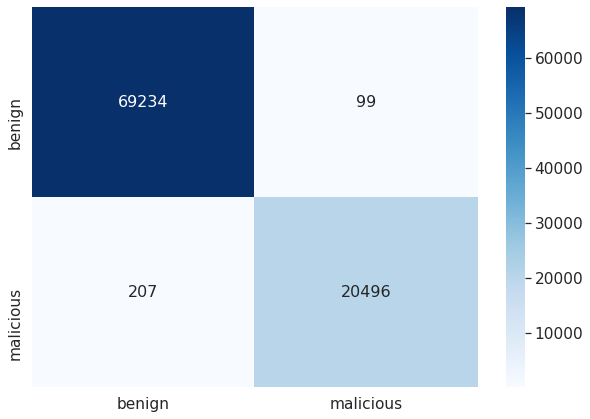

In [16]:
cm_xgb = confusion_matrix(y_test, y_xgb)
acc_xgb = accuracy_score(y_test, y_xgb)
pre_xgb = precision_score(y_test, y_xgb, average='macro')
recall_xgb = recall_score(y_test, y_xgb, average='macro')
print(acc_xgb)
print(pre_xgb)
print(recall_xgb)
array_xgb = cm_xgb
df_xgb = pd.DataFrame(array_xgb, index = [i for i in ['benign', 'malicious']],
                  columns = [i for i in ['benign', 'malicious']])
sns.set(font_scale=1.4) # for label size
plt.figure(figsize = (10,7))
plt.ticklabel_format(style='plain', axis='y')
sns.heatmap(df_xgb, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # font size

In [17]:
lgb = LGBMClassifier(objective='binary',boosting_type= 'gbdt',n_jobs = 5, silent = True, random_state=5)
lgb.fit(X_train, y_train)
y_lgb = lgb.predict(X_test)

/home/ayyappan/anaconda3/lib/python3.7/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


0.9966679994668799
0.9958468228499266
0.9947365966173055


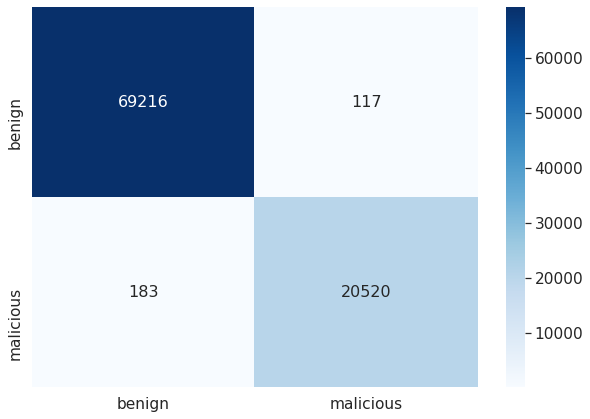

In [18]:
cm_lgb = confusion_matrix(y_test, y_lgb)
acc_lgb = accuracy_score(y_test, y_lgb)
pre_lgb = precision_score(y_test, y_lgb, average='macro')
recall_lgb = recall_score(y_test, y_lgb, average='macro')
print(acc_lgb)
print(pre_lgb)
print(recall_lgb)
array_lgb = cm_lgb
df_lgb = pd.DataFrame(array_lgb, index = [i for i in ['benign', 'malicious']],
                  columns = [i for i in ['benign', 'malicious']])
sns.set(font_scale=1.4) # for label size
plt.figure(figsize = (10,7))
plt.ticklabel_format(style='plain', axis='y')
sns.heatmap(df_lgb, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # font size

In [19]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_rfc = rfc.predict(X_test)

0.9966457861299924
0.9961520976059011
0.9943664436333276


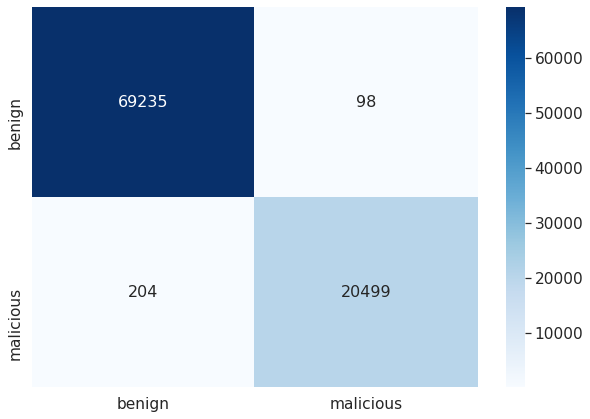

In [20]:
cm_rfc = confusion_matrix(y_test, y_rfc)
acc_rfc = accuracy_score(y_test, y_rfc)
pre_rfc = precision_score(y_test, y_rfc, average='macro')
recall_rfc = recall_score(y_test, y_rfc, average='macro')
print(acc_rfc)
print(pre_rfc)
print(recall_rfc)
array_rfc = cm_rfc
df_rfc = pd.DataFrame(array_rfc, index = [i for i in ['benign', 'malicious']],
                  columns = [i for i in ['benign', 'malicious']])
sns.set(font_scale=1.4) # for label size
plt.figure(figsize = (10,7))
plt.ticklabel_format(style='plain', axis='y')
sns.heatmap(df_rfc, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # font size